In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("/content/Customers.csv")
products = pd.read_csv("/content/Products.csv")
transactions = pd.read_csv("/content/Transactions - Transactions.csv")

# Convert date columns to datetime
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"])
transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"])



In [3]:
# 1. Overview of each dataset
print("Customers Dataset Info:")
print(customers.info())
print("\nProducts Dataset Info:")
print(products.info())
print("\nTransactions Dataset Info:")
print(transactions.info())

Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeI

In [4]:
# 2. Summary statistics
print("\nCustomers Dataset Summary:")
print(customers.describe(include="all"))
print("\nProducts Dataset Summary:")
print(products.describe(include="all"))
print("\nTransactions Dataset Summary:")
print(transactions.describe(include="all"))



Customers Dataset Summary:
       CustomerID      CustomerName         Region           SignupDate
count         200               200            200                  200
unique        200               200              4                  NaN
top         C0001  Lawrence Carroll  South America                  NaN
freq            1                 1             59                  NaN
mean          NaN               NaN            NaN  2023-07-19 08:31:12
min           NaN               NaN            NaN  2022-01-22 00:00:00
25%           NaN               NaN            NaN  2022-09-26 12:00:00
50%           NaN               NaN            NaN  2023-08-31 12:00:00
75%           NaN               NaN            NaN  2024-04-12 12:00:00
max           NaN               NaN            NaN  2024-12-28 00:00:00

Products Dataset Summary:
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100               

In [5]:

# 3. Missing values check
print("\nMissing Values in Customers Dataset:")
print(customers.isnull().sum())
print("\nMissing Values in Products Dataset:")
print(products.isnull().sum())
print("\nMissing Values in Transactions Dataset:")
print(transactions.isnull().sum())


Missing Values in Customers Dataset:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products Dataset:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions Dataset:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


<ipython-input-6-39e68b2aa65b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x="Region", palette="viridis")


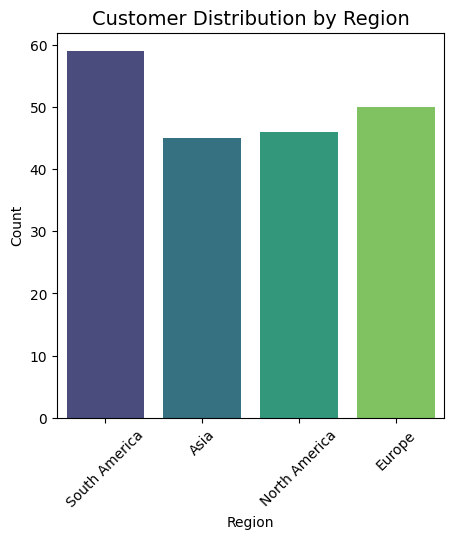

In [6]:
# 4. Distribution of customers by region
plt.figure(figsize=(5, 5))
sns.countplot(data=customers, x="Region", palette="viridis")
plt.title("Customer Distribution by Region", fontsize=14)
plt.xlabel("Region")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

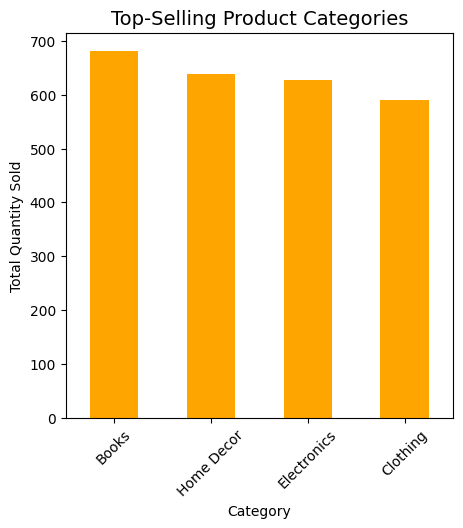

In [7]:
# 5. Top-selling product categories
top_categories = transactions.merge(products, on="ProductID") \
    .groupby("Category")["Quantity"].sum().sort_values(ascending=False)

plt.figure(figsize=(5, 5))
top_categories.plot(kind="bar", color="orange")
plt.title("Top-Selling Product Categories", fontsize=14)
plt.xlabel("Category")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.show()

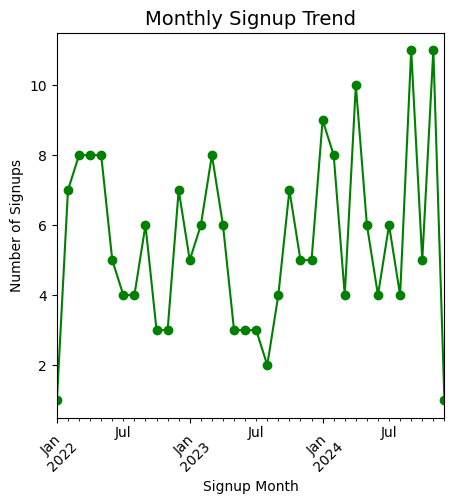

In [8]:
# 6. Monthly signup trend
customers["SignupMonth"] = customers["SignupDate"].dt.to_period("M")
signup_trend = customers.groupby("SignupMonth")["CustomerID"].count()

plt.figure(figsize=(5, 5))
signup_trend.plot(kind="line", marker="o", color="green")
plt.title("Monthly Signup Trend", fontsize=14)
plt.xlabel("Signup Month")
plt.ylabel("Number of Signups")
plt.xticks(rotation=45)
plt.show()

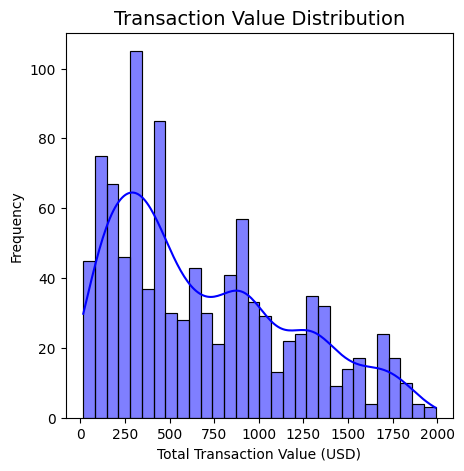

In [9]:
# 7. Transaction value distribution
plt.figure(figsize=(5, 5))
sns.histplot(transactions["TotalValue"], bins=30, kde=True, color="blue")
plt.title("Transaction Value Distribution", fontsize=14)
plt.xlabel("Total Transaction Value (USD)")
plt.ylabel("Frequency")
plt.show()

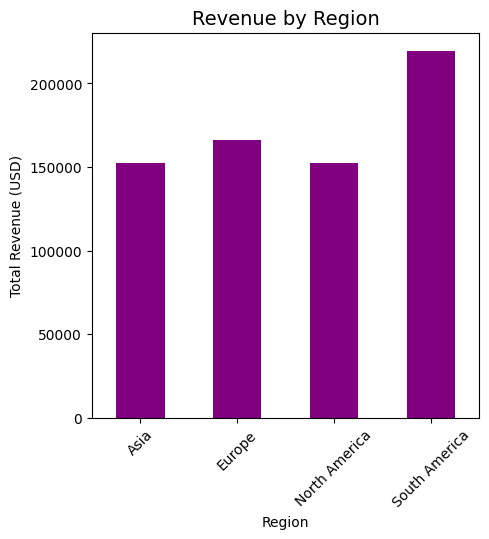

In [10]:

# 8. Revenue by region
transactions_with_customers = transactions.merge(customers, on="CustomerID")
revenue_by_region = transactions_with_customers.groupby("Region")["TotalValue"].sum()

plt.figure(figsize=(5, 5))
revenue_by_region.plot(kind="bar", color="purple")
plt.title("Revenue by Region", fontsize=14)
plt.xlabel("Region")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=45)
plt.show()

In [11]:
# 9. Correlation heatmap for transactions
# Select only numerical columns for the correlation heatmap
numeric_columns = transactions.select_dtypes(include=["float64", "int64"])
correlation_matrix = numeric_columns.corr()

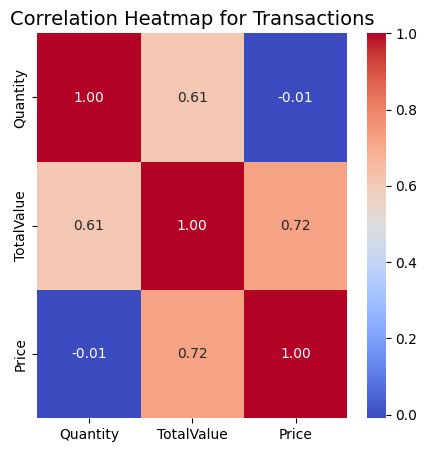

In [12]:

# Plot the heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for Transactions", fontsize=14)
plt.show()